In [1]:
from math import sqrt

def mean(values):
    return sum(values)/ len(values)

def variance(values, mean):
    return sum((i - mean)**2 for i in values) / len(values)

def covariance(xs , mean_x, ys, mean_y):
    return sum((xs[i] - mean_x)*(ys[i] - mean_y) for i in range (len(xs))) / len(xs)

def coefficients(dataset):
    X = [i[0] for i in dataset]
    Y = [i[1] for i in dataset]

    mean_x = mean(X)
    mean_y = mean(Y)

    b1 = covariance(X, mean_x, Y, mean_y) / variance(X, mean_x)
    b0 = mean_y - b1 * mean_x

    return b0 , b1

def predict_row(x_value, b0,b1):
    return b0 - b1 * x_value

def simple_linear_regression(train_data, test_data):
    b0 , b1 = coefficients(train_data)
    return [predict_row(i[0], b0, b1) for i in test_data]

def rmse_calc(predicted, actual):
    return sqrt(sum([(actual[i] - predicted[i])**2 for i  in range (len(actual))]) / len(actual))

def evaluate_algorithm(dataset):
    test_data = [[x[0],None] for x in dataset]
    predicted = simple_linear_regression(dataset, test_data)
    actual = [x[1] for x in dataset]

    return rmse_calc(predicted, actual)

dataset = [
    [1, 1],
    [2, 3],
    [4, 3],
    [3, 2],
    [5, 5]
]

b0 , b1 = coefficients(dataset)
print("RMSE= ", evaluate_algorithm(dataset))
print("b0 = ",b0 ,"\nb1 = ", b1)

RMSE=  5.351635264103861
b0 =  0.39999999999999947 
b1 =  0.8


In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/home/dikshith/Documents/SEM V LAB CODES/AIML/datasets/p2.csv')
attributes = np.array(dataset)[:,:-1]
target = np.array(dataset)[:,-1]

print(attributes,'\n')
print(target)

def hypothesis(attributes, target):
    specific_h =  None
    for i ,value in enumerate(target):
        if value == "Yes":
            specific_h = attributes[i].copy()
            break
    
    for i, value in enumerate(target):
        if value == "Yes":
            for j in range(len(specific_h)):
                if attributes[i][j] != specific_h[j]:
                    specific_h[j] = '?'
    return specific_h

print("Find S algorithm: ",hypothesis(attributes, target))

[['Morning' 'Sunny' 'Warm' 'Yes' 'Mild' 'Strong']
 ['Evening' 'Rainy' 'Cold' 'No' 'Mild' 'Normal']
 ['Morning' 'Sunny' 'Moderate' 'Yes' 'Normal' 'Normal']
 ['Evening' 'Sunny' 'Cold' 'Yes' 'High' 'Strong']] 

['Yes' 'No' 'Yes' 'Yes']
Find S algorithm:  ['?' 'Sunny' '?' 'Yes' '?' '?']


In [25]:
import numpy as np
import pandas as pd

data = pd.read_csv('/home/dikshith/Documents/SEM V LAB CODES/AIML/datasets/p3.csv')
concepts = np.array(data)[:, :-1]
target = np.array(data)[:, -1]

def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]

    for i, instance in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if instance[x] != specific_h[x]:
                    specific_h[x] = "?"
                    general_h[x][x] = "?"
        else:
            for x in range(len(specific_h)):
                if instance[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = "?"

        print("Updated Specific Hypothesis:", specific_h)
        print("Updated General Hypothesis:", general_h)

    general_h = [g for g in general_h if g != ["?"] * len(specific_h)]

    return specific_h, general_h


print(learn(concepts, target))


Updated Specific Hypothesis: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Updated General Hypothesis: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Updated Specific Hypothesis: ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
Updated General Hypothesis: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Updated Specific Hypothesis: ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
Updated General Hypothesis: [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'Same']]
Updated Specific Hypothesis: ['Sunny' 'Warm' '?' 'Strong' '?' '?']
Updated General Hypothesis: [['Sunny

In [11]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv("/home/dikshith/Documents/SEM V LAB CODES/AIML/datasets/p5.csv") # Added names argument for safety

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10, random_state=42)

classifier = KNeighborsClassifier(n_neighbors=5).fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)

print(f"{'Original Label':<25} {'Predicted Label':<25} {'Correct/Wrong'}")
print("-" * 65)

for actual, predicted in zip(ytest, ypred):
    status = "Correct" if actual == predicted else "Wrong"
    print(f"{actual:<25} {predicted:<25} {status}")

print("\nConfusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
print("\nClassification Report:\n", metrics.classification_report(ytest, ypred))
print(f"Accuracy: {metrics.accuracy_score(ytest, ypred):.2f}")

Original Label            Predicted Label           Correct/Wrong
-----------------------------------------------------------------
versicolor                versicolor                Correct
setosa                    setosa                    Correct
virginica                 virginica                 Correct
versicolor                versicolor                Correct
versicolor                versicolor                Correct
setosa                    setosa                    Correct
versicolor                versicolor                Correct
virginica                 virginica                 Correct
versicolor                versicolor                Correct
versicolor                virginica                 Wrong
virginica                 virginica                 Correct
setosa                    setosa                    Correct
setosa                    setosa                    Correct
setosa                    setosa                    Correct
setosa                    seto

In [13]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('QtAgg')

# --------------------------------------------
# 1. LOAD DATA
# --------------------------------------------
data = pd.read_csv("/home/dikshith/Documents/SEM V LAB CODES/AIML/datasets/p8.csv")

# FIXED: Use .iloc for DataFrame slicing
# We keep X as a DataFrame so we can access columns by name (X.Petal_Length)
X = data.iloc[:, :-1]

# Convert iris labels to numbers manually to match color map
label_map = {
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
}
# Note: If your CSV uses "Iris-setosa", change keys above accordingly.
# The generator above uses "setosa", "versicolor", "virginica".
y_true = np.array([label_map[label] for label in data.iloc[:, -1]])

# Colors: 0=Red, 1=Lime, 2=Black
colors = np.array(['red', 'lime', 'black'])

plt.figure(figsize=(15, 5))

# --------------------------------------------
# 2. REAL LABELS PLOT
# --------------------------------------------
plt.subplot(1, 3, 1)
plt.title("Actual Labels")
plt.scatter(X.Petal_Length, X.Petal_Width, c=colors[y_true])

# --------------------------------------------
# 3. K-MEANS CLUSTERING
# --------------------------------------------
# random_state=42 acts as your "seed" for reproducible results
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.subplot(1, 3, 2)
plt.title("K-Means Clustering")
plt.scatter(X.Petal_Length, X.Petal_Width, c=colors[kmeans_labels])

print("K-Means Accuracy:", metrics.accuracy_score(y_true, kmeans_labels))
print("K-Means Confusion Matrix:\n", metrics.confusion_matrix(y_true, kmeans_labels))

# --------------------------------------------
# 4. GMM (EM) CLUSTERING
# --------------------------------------------
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)

plt.subplot(1, 3, 3)
plt.title("GMM (EM) Clustering")
plt.scatter(X.Petal_Length, X.Petal_Width, c=colors[gmm_labels])

print("GMM Accuracy:", metrics.accuracy_score(y_true, gmm_labels))
print("GMM Confusion Matrix:\n", metrics.confusion_matrix(y_true, gmm_labels))

plt.tight_layout()
plt.show()

K-Means Accuracy: 0.09333333333333334
K-Means Confusion Matrix:
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]
GMM Accuracy: 0.0
GMM Confusion Matrix:
 [[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]


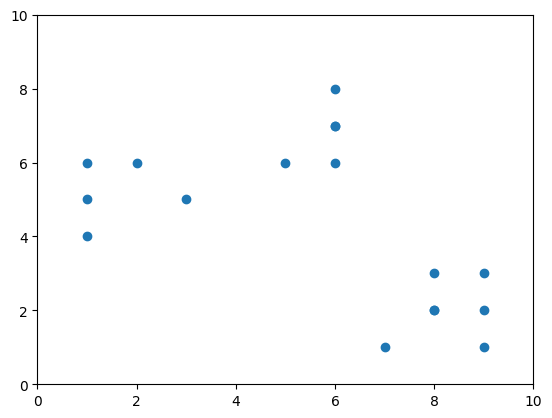

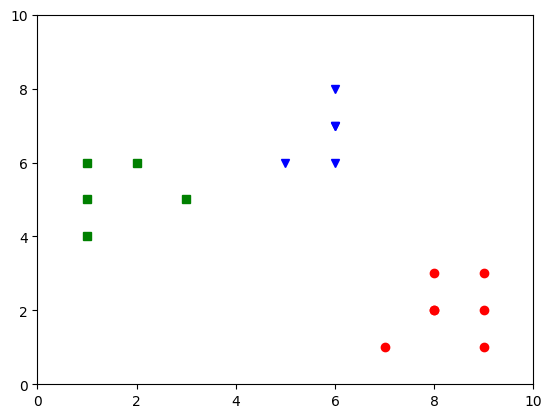

In [29]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.xlim([0,10])
plt.ylim([0,10])
plt.scatter(x1,x2)
plt.show()

X = np.array(list(zip(x1,x2))).reshape(len(x1),2)
colors = ['r','g','b']
markers = ['o','s','v']

K = 3
kmeans = KMeans(K).fit(X)
plt.plot()
for i, l in enumerate(kmeans.labels_):
    plt.plot(x1[i],x2[i], color=colors[l], marker=markers[l])

plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

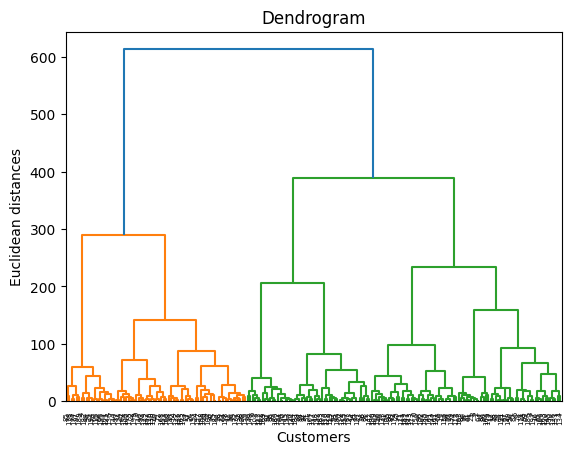

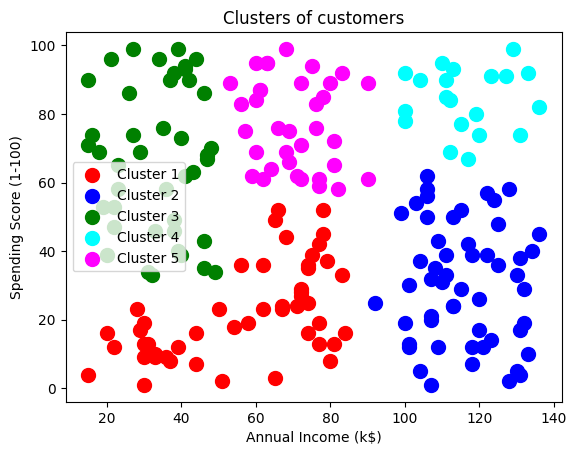

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dataset = pd.read_csv('/home/dikshith/Documents/SEM V LAB CODES/AIML/datasets/p9.csv')
X = dataset.iloc[:, [3, 4]].values

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
plt.scatter(
	X[y_hc == 0, 0],
	X[y_hc == 0, 1],
	s=100,
	c='red',
	label='Cluster 1'
)
plt.scatter(
	X[y_hc == 1, 0],
	X[y_hc == 1, 1],
	s=100,
	c='blue',
	label='Cluster 2'
)
plt.scatter(
	X[y_hc == 2, 0],
	X[y_hc == 2, 1],
	s=100,
	c='green',
	label='Cluster 3'
)
plt.scatter(
	X[y_hc == 3, 0],
	X[y_hc == 3, 1],
	s=100,
	c='cyan',
	label='Cluster 4'
)
plt.scatter(
	X[y_hc == 4, 0],
	X[y_hc == 4, 1],
	s=100,
	c='magenta',
	label='Cluster 5'
)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [10]:
import numpy as np
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

heartDisease = pd.read_csv("/home/dikshith/Documents/SEM V LAB CODES/AIML/datasets/p6.csv")
heartDisease = heartDisease.replace('?', np.nan).dropna()

print('Few examples from the dataset are given below')
print(heartDisease.head())

model = DiscreteBayesianNetwork([
    ('age', 'Heartdisease'),
    ('gender', 'Heartdisease'),
    ('exang', 'Heartdisease'),
    ('cp', 'Heartdisease'),
    ('Heartdisease', 'restecg'),
    ('Heartdisease', 'chol')
])

print('\nLearning CPD using Maximum Likelihood Estimators...')
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

print('\nInferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)

print('\n1. Probability of HeartDisease given evidence: age=35')
q1 = HeartDiseasetest_infer.query(
    variables=['Heartdisease'],
    evidence={'age': 35}
)
print("Valid 'chol' values:", heartDisease['chol'].unique())
print(q1)
print('\n2. Probability of HeartDisease given evidence: chol=250')
q2 = HeartDiseasetest_infer.query(
    variables=['Heartdisease'],
    evidence={'chol': 259}
)
print(q2)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'age': 'N', 'gender': 'N', 'cp': 'N', 'trestbps': 'N', 'chol': 'N', 'fbs': 'N', 'restecg': 'N', 'thalach': 'N', 'exang': 'N', 'oldpeak': 'N', 'slope': 'N', 'ca': 'N', 'thal': 'N', 'Heartdisease': 'N'}


Few examples from the dataset are given below
   age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0   67       0   2       162   548    1        2      160      0  1.043371   
1   57       1   3       169   126    0        2      180      0  2.377452   
2   43       0   0       109   512    1        1      127      1  4.549431   
3   71       1   3       183   473    1        1       71      1  4.176124   
4   36       0   0       183   315    1        0      133      1  0.923375   

   slope  ca  thal  Heartdisease  
0      1   0     3             0  
1      1   2     0             1  
2      1   3     1             0  
3      2   0     0             1  
4      2   3     1             1  

Learning CPD using Maximum Likelihood Estimators...

Inferencing with Bayesian Network:

1. Probability of HeartDisease given evidence: age=35
Valid 'chol' values: [548 126 512 473 315 316 494 534 437 542 547 242 259 183 169 298 285 442
 428 274 205 499 338 328 377 354 289 